# Карта Мира
Используется карта с равнопромежуточными проекциями

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

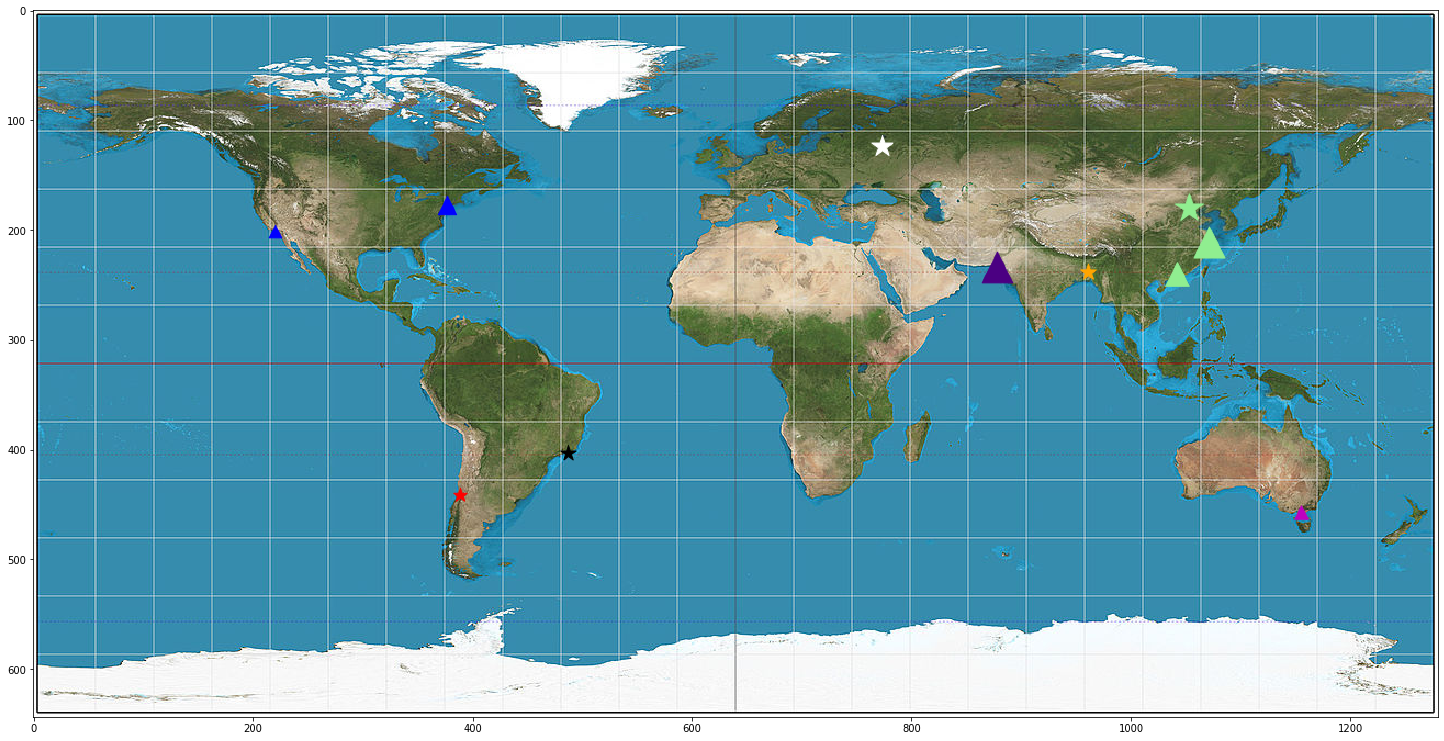

In [2]:
def get_coord(long, lat):           # x, y
    long = int(dim[1] / 360 * long)
    lat = int(dim[0] / 180 * lat) 
    return long, lat

# загружаем карту и считаем ее важные параметры
fig, axes = plt.subplots(figsize=(26, 13))
with open('world.jpg', 'rb') as map_file:
    map_img = plt.imread(map_file)
dim = map_img.shape             # y, x
center = (dim[1]//2, dim[0]//2) # x, y


# получаем координаты городов
df = pd.read_csv('cities.csv')
df.groupby('Country')
df = df[df['Population'] > 1000000]

countries = []
colors = ['_', 'w', 'b', 'm', 'r', 'lightgreen', 'orange', 'indigo', 'k']

# итерируемся по списку
for index, row in df.iterrows():
    lat_rd = row['Longitude deg'] + row['Longitude min'] / 60 + row['Longitude sec'] / 3600
    long_rd = row['Latitude deg'] + row['Latitude min'] / 60 + row['Latitude sec'] / 3600
    long, lat  = get_coord(long_rd, lat_rd)
    mark = '*' if row['Capital'] == 1 else '^'
    size = 40 * row['Population'] // 1000000
    # меняем цвет
    if row['Country'] not in countries:
        countries.append(row['Country'])
        colors = colors[1:]        
    color = colors[0]    
    plt.scatter([center[0] + long], [center[1] - lat], s=size, color=color, marker=mark)

axes.imshow(map_img)
plt.show()
fig.savefig('result.svg')

In [3]:
len(range(10))

10